data preparation

In [114]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import os

directory = '/content/drive/MyDrive/pmdata/p01/fitbit'

files = os.listdir(directory)

for file in files:
    print(file)


calories.json
exercise.json
distance.json
resting_heart_rate.json
moderately_active_minutes.json
heart_rate.json
lightly_active_minutes.json
sedentary_minutes.json
sleep.json
sleep_score.csv
steps.json
time_in_heart_rate_zones.json
very_active_minutes.json
calories.csv
combined.csv
combined1.csv
combined2.csv
combined3.csv


In [116]:
import pandas as pd
import json

with open('/content/drive/MyDrive/pmdata/p01/fitbit/exercise.json') as f:
    data = json.load(f)

pm_p1_exercises = pd.json_normalize(data)

print(pm_p1_exercises.head(2))


         logId activityName  activityTypeId  \
0  26451905128         Walk           90013   
1  26455950499         Walk           90013   

                                       activityLevel  averageHeartRate  \
0  [{'minutes': 0, 'name': 'sedentary'}, {'minute...                94   
1  [{'minutes': 0, 'name': 'sedentary'}, {'minute...                94   

   calories  duration  activeDuration  steps        logType  ... distanceUnit  \
0       192   1331000         1331000   1878  auto_detected  ...          NaN   
1       302   2202000         2202000   2786  auto_detected  ...          NaN   

  tcxLink speed pace  source.type  source.name  source.id  source.url  \
0     NaN   NaN  NaN          NaN          NaN        NaN         NaN   
1     NaN   NaN  NaN          NaN          NaN        NaN         NaN   

   source.trackerFeatures  vo2Max.vo2Max  
0                     NaN            NaN  
1                     NaN            NaN  

[2 rows x 32 columns]


In [117]:

with open('/content/drive/MyDrive/pmdata/p01/fitbit/calories.json') as f:
    data = json.load(f)

pm_p2_calories = pd.json_normalize(data)

print(pm_p2_calories.head(2))


              dateTime value
0  2019-11-01 00:00:00  1.39
1  2019-11-01 00:01:00  1.39


In [118]:
with open('/content/drive/MyDrive/pmdata/p01/fitbit/sleep.json') as f:
    data = json.load(f)

pm_p3_sleep = pd.json_normalize(data)

print(pm_p3_sleep.head(2))
print(pm_p3_sleep.columns)


         logId dateOfSleep            startTime                  endTime  \
0  24486013387  2019-11-02  2019-11-02 00:09:30  2019-11-02T07:19:30.000   
1  24497341340  2019-11-03  2019-11-03 00:32:00  2019-11-03T07:34:30.000   

   duration  minutesToFallAsleep  minutesAsleep  minutesAwake  \
0  25800000                    0            378            52   
1  25320000                    0            378            44   

   minutesAfterWakeup  timeInBed  ...  levels.summary.wake.minutes  \
0                   0        430  ...                           52   
1                   0        422  ...                           44   

  levels.summary.wake.thirtyDayAvgMinutes  levels.summary.light.count  \
0                                      42                          30   
1                                      42                          33   

   levels.summary.light.minutes  levels.summary.light.thirtyDayAvgMinutes  \
0                           259                                    

NOTE: I also inspected the rest of the files, but found these three to be the most useful in answering the questions set upon the analysis

In [119]:
import pandas as pd
from datetime import datetime

cleaned_pm_p01_exercises = pd.read_json('/content/drive/MyDrive/pmdata/p01/fitbit/exercise.json')


cleaned_pm_p01_exercises = cleaned_pm_p01_exercises[['activityName', 'startTime']]
cleaned_pm_p01_exercises['startTime'] = pd.to_datetime(cleaned_pm_p01_exercises['startTime'], format='%Y-%m-%d %H:%M:%S')


cleaned_pm_p01_exercises['participant_id'] = 'p01'


In [120]:

cleaned_pm_p02_exercises = pd.read_json('/content/drive/MyDrive/pmdata/p02/fitbit/exercise.json')


cleaned_pm_p02_exercises = cleaned_pm_p01_exercises[['activityName', 'startTime']]
cleaned_pm_p02_exercises['startTime'] = pd.to_datetime(cleaned_pm_p02_exercises['startTime'], format='%Y-%m-%d %H:%M:%S')


cleaned_pm_p01_exercises['participant_id'] = 'p02'

<ipython-input-120-cc16a994f65c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_pm_p02_exercises['startTime'] = pd.to_datetime(cleaned_pm_p02_exercises['startTime'], format='%Y-%m-%d %H:%M:%S')


In [121]:
import json
import pandas as pd
from datetime import datetime
from tzlocal import get_localzone


file_paths = ["/content/drive/MyDrive/pmdata/p01/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p02/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p03/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p04/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p05/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p06/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p07/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p08/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p09/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p10/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p11/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p12/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p13/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p14/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p15/fitbit/exercise.json",
              "/content/drive/MyDrive/pmdata/p16/fitbit/exercise.json"]


def clean_data(file_path):

    with open(file_path) as f:
        data = json.load(f)

    df = pd.DataFrame(data)[["activityName", "startTime","steps","calories"]]

    df["startTime"] = pd.to_datetime(df["startTime"])

    participant_id = file_path.split("/")[-3][-2:]
    df["participant_id"] = "p" + participant_id
    return df


cleaned_pm_exercises = pd.concat([clean_data(file_path) for file_path in file_paths], ignore_index=True)


print(cleaned_pm_exercises.head())



  activityName           startTime   steps  calories participant_id
0         Walk 2019-11-01 14:56:32  1878.0       192            p01
1         Walk 2019-11-01 19:03:11  2786.0       302            p01
2         Walk 2019-11-02 13:26:38  3035.0       354            p01
3         Walk 2019-11-04 21:22:08  1284.0       145            p01
4         Walk 2019-11-05 19:27:25  1065.0       121            p01


cleaned excerise data - value in minuites

In [122]:

print(cleaned_pm_exercises.head(10))


  activityName           startTime   steps  calories participant_id
0         Walk 2019-11-01 14:56:32  1878.0       192            p01
1         Walk 2019-11-01 19:03:11  2786.0       302            p01
2         Walk 2019-11-02 13:26:38  3035.0       354            p01
3         Walk 2019-11-04 21:22:08  1284.0       145            p01
4         Walk 2019-11-05 19:27:25  1065.0       121            p01
5          Run 2019-11-05 22:40:41  3901.0       396            p01
6         Walk 2019-11-08 15:04:32  2094.0       252            p01
7         Walk 2019-11-09 06:44:58  4185.0       454            p01
8         Walk 2019-11-10 07:49:30  4698.0       470            p01
9          Run 2019-11-11 20:53:44  3384.0       339            p01


very active every minute

In [123]:
import pandas as pd
import numpy as np
from datetime import datetime


very_active_minutes_p01 = pd.read_json('/content/drive/MyDrive/pmdata/p01/fitbit/very_active_minutes.json')


very_active_minutes_p01['participant_id'] = 'p01'


pd.set_option('display.max_rows', 10)


very_active_minutes_p01['value'].replace(['-',' ',''], np.nan, inplace=True)


print(very_active_minutes_p01)


      dateTime  value participant_id
0   2019-11-01     72            p01
1   2019-11-02     56            p01
2   2019-11-03     45            p01
3   2019-11-04     28            p01
4   2019-11-05     56            p01
..         ...    ...            ...
147 2020-03-27     65            p01
148 2020-03-28     83            p01
149 2020-03-29     22            p01
150 2020-03-30      8            p01
151 2020-03-31     44            p01

[152 rows x 3 columns]


In [124]:
import pandas as pd
import numpy as np
from datetime import datetime


file_paths = ['/content/drive/MyDrive/pmdata/p01/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p02/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p03/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p04/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p05/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p06/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p07/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p08/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p09/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p10/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p11/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p12/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p13/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p14/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p15/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p16/fitbit/very_active_minutes.json']


dfs = []
for i, file_path in enumerate(file_paths):
    df = pd.read_json(file_path)
    df['participant_id'] = f'p{i+1:02d}'
    df['value'].replace(['-', ' ', ''], np.nan, inplace=True)
    dfs.append(df)


cleaned_pm_active_minutes = pd.concat(dfs, ignore_index=True)


pd.set_option('display.max_rows', 10)
print(cleaned_pm_active_minutes)


       dateTime  value participant_id
0    2019-11-01     72            p01
1    2019-11-02     56            p01
2    2019-11-03     45            p01
3    2019-11-04     28            p01
4    2019-11-05     56            p01
...         ...    ...            ...
2391 2020-03-27      5            p16
2392 2020-03-28      0            p16
2393 2020-03-29      0            p16
2394 2020-03-30      4            p16
2395 2020-03-31      0            p16

[2396 rows x 3 columns]


moderately_active_minutes

In [125]:
import pandas as pd
import numpy as np
from datetime import datetime


file_paths = ['/content/drive/MyDrive/pmdata/p01/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p02/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p03/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p04/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p05/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p06/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p07/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p08/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p09/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p10/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p11/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p12/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p13/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p14/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p15/fitbit/moderately_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p16/fitbit/moderately_active_minutes.json']


dfs = []
for i, file_path in enumerate(file_paths):
    df = pd.read_json(file_path)
    df['participant_id'] = f'p{i+1:02d}'
    df['value'].replace(['-', ' ', ''], np.nan, inplace=True)
    dfs.append(df)


cleaned_pm_active_minutes = pd.concat(dfs, ignore_index=True)


pd.set_option('display.max_rows', 10)
print(cleaned_pm_active_minutes)


       dateTime  value participant_id
0    2019-11-01     58            p01
1    2019-11-02     43            p01
2    2019-11-03     63            p01
3    2019-11-04     23            p01
4    2019-11-05     22            p01
...         ...    ...            ...
2391 2020-03-27      4            p16
2392 2020-03-28      0            p16
2393 2020-03-29      0            p16
2394 2020-03-30      9            p16
2395 2020-03-31      0            p16

[2396 rows x 3 columns]


lightly_active_minutes.json, in this the p11 does not have a file so we have added their value to 0

In [126]:
import pandas as pd
import numpy as np
from datetime import datetime


file_paths = ['/content/drive/MyDrive/pmdata/p01/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p02/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p03/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p04/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p05/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p06/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p07/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p08/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p09/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p10/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p11/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p12/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p13/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p14/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p15/fitbit/very_active_minutes.json',
              '/content/drive/MyDrive/pmdata/p16/fitbit/very_active_minutes.json']


dfs = []
for i, file_path in enumerate(file_paths):
    if i == 0:
        df = pd.read_json(file_path)
    else:
        prev_df = dfs[-1].copy()
        df = pd.read_json(file_path)
        df = pd.concat([prev_df.iloc[-1:], df], ignore_index=True)
        df['value'].replace(['-', ' ', ''], np.nan, inplace=True)
        df['value'].fillna(value=0, inplace=True)
    df['participant_id'] = f'p{i+1:02d}'
    dfs.append(df)


cleaned_pm_active_minutes = pd.concat(dfs, ignore_index=True)


pd.set_option('display.max_rows', 10)
print(cleaned_pm_active_minutes)


       dateTime  value participant_id
0    2019-11-01     72            p01
1    2019-11-02     56            p01
2    2019-11-03     45            p01
3    2019-11-04     28            p01
4    2019-11-05     56            p01
...         ...    ...            ...
2406 2020-03-27      5            p16
2407 2020-03-28      0            p16
2408 2020-03-29      0            p16
2409 2020-03-30      4            p16
2410 2020-03-31      0            p16

[2411 rows x 3 columns]


sleep data

In [127]:
import pandas as pd
import json
from pandas.io.json import json_normalize


with open('/content/drive/MyDrive/pmdata/p01/fitbit/sleep.json') as f:
    sleep_dict = json.load(f)


sleep_p01 = pd.DataFrame.from_dict(sleep_dict).drop('levels', axis=1)

sleep_p01['participant_id'] = 'p01'


sleep_p01.drop(['logId', 'infoCode', 'mainSleep', 'type', 'efficiency'], axis=1, inplace=True)
sleep_p01.rename(columns={'dateOfSleep': 'dateTime'}, inplace=True)


sleep_p01['minutesAsleep'] = sleep_p01['minutesAsleep'].apply(lambda x: pd.NaT if x == '-' or x == '' else x)
sleep_p01['timeInBed'] = sleep_p01['timeInBed'].apply(lambda x: pd.NaT if x == '-' or x == '' else x)
sleep_p01['duration'] = sleep_p01['duration'].apply(lambda x: pd.NaT if x == '-' or x == '' else x / 360000)


sleep_p01 = sleep_p01.applymap(str).drop_duplicates()


duplicates_sleep_p01 = sum(sleep_p01.duplicated())
print(f"dataset: sleep_p01, contains {duplicates_sleep_p01} duplicates")


sleep_p01 = sleep_p01.drop(['startTime', 'endTime'], axis=1)


sleep_p01 = sleep_p01.groupby('dateTime').agg({'duration': 'sum',
                                                'minutesToFallAsleep': 'sum',
                                                'minutesAsleep': 'sum',
                                                'minutesAwake': 'sum',
                                                'minutesAfterWakeup': 'sum',
                                                'timeInBed': 'sum'})
sleep_p01['participant_id'] = 'p01'
print(sleep_p01.head(10))


dataset: sleep_p01, contains 0 duplicates
                      duration minutesToFallAsleep minutesAsleep minutesAwake  \
dateTime                                                                        
2019-11-02   71.66666666666667                   0           378           52   
2019-11-03   70.33333333333333                   0           378           44   
2019-11-04                66.5                   0           361           38   
2019-11-05  60.333333333333336                   0           326           36   
2019-11-06  60.666666666666664                   0           341           23   
2019-11-07                61.0                   0           312           54   
2019-11-08   65.33333333333333                   0           360           32   
2019-11-09   65.16666666666667                   0           344           47   
2019-11-10   70.33333333333333                   0           382           40   
2019-11-11  59.333333333333336                   0           318   

In [128]:
print(sleep_p01.columns)



Index(['duration', 'minutesToFallAsleep', 'minutesAsleep', 'minutesAwake',
       'minutesAfterWakeup', 'timeInBed', 'participant_id'],
      dtype='object')


In [129]:
import pandas as pd
import json
from pandas.io.json import json_normalize


sleep_dataframes = []

for i in range(1, 17):

    file_path = f"/content/drive/MyDrive/pmdata/p{i:02d}/fitbit/sleep.json"


    with open(file_path) as f:
        sleep_dict = json.load(f)

    sleep_df = pd.DataFrame.from_dict(sleep_dict).drop('levels', axis=1)


    sleep_df.drop(['logId', 'infoCode', 'mainSleep', 'type', 'efficiency'], axis=1, inplace=True)
    sleep_df.rename(columns={'dateOfSleep': 'dateTime'}, inplace=True)


    sleep_df['minutesAsleep'] = sleep_df['minutesAsleep'].apply(lambda x: pd.NaT if x == '-' or x == '' else x)
    sleep_df['timeInBed'] = sleep_df['timeInBed'].apply(lambda x: pd.NaT if x == '-' or x == '' else x)
    sleep_df['duration'] = sleep_df['duration'].apply(lambda x: pd.NaT if x == '-' or x == '' else x / 360000)

    sleep_df = sleep_df.applymap(str).drop_duplicates()


    sleep_df = sleep_df.drop(['startTime', 'endTime'], axis=1)


    sleep_df = sleep_df.groupby('dateTime').agg({'duration': 'sum',
                                                    'minutesToFallAsleep': 'sum',
                                                    'minutesAsleep': 'sum',
                                                    'minutesAwake': 'sum',
                                                    'minutesAfterWakeup': 'sum',
                                                    'timeInBed': 'sum'})


    sleep_df['participant_id'] = f"p{i:02d}"


    sleep_dataframes.append(sleep_df)

merged_sleep = pd.concat(sleep_dataframes)

print(merged_sleep.head(10))




                      duration minutesToFallAsleep minutesAsleep minutesAwake  \
dateTime                                                                        
2019-11-02   71.66666666666667                   0           378           52   
2019-11-03   70.33333333333333                   0           378           44   
2019-11-04                66.5                   0           361           38   
2019-11-05  60.333333333333336                   0           326           36   
2019-11-06  60.666666666666664                   0           341           23   
2019-11-07                61.0                   0           312           54   
2019-11-08   65.33333333333333                   0           360           32   
2019-11-09   65.16666666666667                   0           344           47   
2019-11-10   70.33333333333333                   0           382           40   
2019-11-11  59.333333333333336                   0           318           38   

           minutesAfterWake

In [130]:
print(merged_sleep.columns)

Index(['duration', 'minutesToFallAsleep', 'minutesAsleep', 'minutesAwake',
       'minutesAfterWakeup', 'timeInBed', 'participant_id'],
      dtype='object')


In [131]:
print(merged_sleep['participant_id'].unique())

['p01' 'p02' 'p03' 'p04' 'p05' 'p06' 'p07' 'p08' 'p09' 'p10' 'p11' 'p12'
 'p13' 'p14' 'p15' 'p16']


weleness

In [132]:
import pandas as pd

csv_paths = [
    "/content/drive/MyDrive/pmdata/p01/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p02/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p03/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p04/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p05/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p06/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p07/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p08/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p09/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p10/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p11/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p12/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p13/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p14/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p15/pmsys/wellness.csv",
    "/content/drive/MyDrive/pmdata/p16/pmsys/wellness.csv"

]

dfs = []


for i, csv_path in enumerate(csv_paths):

    df = pd.read_csv(csv_path)

    participant_id = f"p{i+1:02d}"
    df['participant_id'] = participant_id


    dfs.append(df)

combined_wellness = pd.concat(dfs, ignore_index=True)


print(combined_wellness)


                      dateTime  fatigue  mood  readiness  sleep_duration_h  \
0     2019-11-01T08:31:40.751Z        2     3          5                 6   
1     2019-11-02T10:00:01.229Z        2     3          6                 6   
2     2019-11-03T14:28:03.263Z        3     3          8                 6   
3     2019-11-04T07:05:28.429Z        3     3          8                 6   
4     2019-11-05T06:13:35.998Z        3     3          8                 5   
...                        ...      ...   ...        ...               ...   
1742                       NaN        3     3          4                 6   
1743                       NaN        2     3          4                 6   
1744                       NaN        4     4          4                10   
1745                       NaN        2     3          4                 5   
1746                       NaN        3     4          4                 8   

      sleep_quality  soreness soreness_area  stress participant

In [133]:
import pandas as pd

combined_wellness["dateTime"] = combined_wellness["dateTime"].fillna(combined_wellness["effective_time_frame"])

combined_wellness.drop("effective_time_frame", axis=1, inplace=True)


print(combined_wellness)


                      dateTime  fatigue  mood  readiness  sleep_duration_h  \
0     2019-11-01T08:31:40.751Z        2     3          5                 6   
1     2019-11-02T10:00:01.229Z        2     3          6                 6   
2     2019-11-03T14:28:03.263Z        3     3          8                 6   
3     2019-11-04T07:05:28.429Z        3     3          8                 6   
4     2019-11-05T06:13:35.998Z        3     3          8                 5   
...                        ...      ...   ...        ...               ...   
1742  2020-03-08T11:44:44.398Z        3     3          4                 6   
1743  2020-03-11T11:33:15.168Z        2     3          4                 6   
1744  2020-03-15T08:33:15.985Z        4     4          4                10   
1745  2020-03-17T09:54:27.989Z        2     3          4                 5   
1746  2020-03-18T09:47:19.341Z        3     4          4                 8   

      sleep_quality  soreness soreness_area  stress participant

selecting only relivant columns for ml

In [134]:
column_names = combined_wellness.columns.tolist()


print(column_names)

['dateTime', 'fatigue', 'mood', 'readiness', 'sleep_duration_h', 'sleep_quality', 'soreness', 'soreness_area', 'stress', 'participant_id']


In [135]:
import pandas as pd

combined_wellness.drop("soreness_area", axis=1, inplace=True)


print(combined_wellness)


                      dateTime  fatigue  mood  readiness  sleep_duration_h  \
0     2019-11-01T08:31:40.751Z        2     3          5                 6   
1     2019-11-02T10:00:01.229Z        2     3          6                 6   
2     2019-11-03T14:28:03.263Z        3     3          8                 6   
3     2019-11-04T07:05:28.429Z        3     3          8                 6   
4     2019-11-05T06:13:35.998Z        3     3          8                 5   
...                        ...      ...   ...        ...               ...   
1742  2020-03-08T11:44:44.398Z        3     3          4                 6   
1743  2020-03-11T11:33:15.168Z        2     3          4                 6   
1744  2020-03-15T08:33:15.985Z        4     4          4                10   
1745  2020-03-17T09:54:27.989Z        2     3          4                 5   
1746  2020-03-18T09:47:19.341Z        3     4          4                 8   

      sleep_quality  soreness  stress participant_id  
0       

In [136]:
import pandas as pd

new_df = combined_wellness.copy()

new_csv_file = '/content/drive/MyDrive/testbard.csv'

new_df.to_csv(new_csv_file, index=False)

print("Data copied to new CSV file successfully.")


Data copied to new CSV file successfully.


checking null values

In [137]:
import pandas as pd

null_counts = combined_wellness.isnull().sum()

columns_with_null = null_counts[null_counts > 0]


if len(columns_with_null) > 0:
    print("Columns with Null Values:")
    for column, count in columns_with_null.items():
        print(f"{column}: {count}")
else:
    print("No Null Values in the DataFrame")


No Null Values in the DataFrame


In [138]:
import pandas as pd


combined_wellness['date'] = combined_wellness['dateTime'].str.split('T').str[0]
combined_wellness['time'] = combined_wellness['dateTime'].str.split('T').str[1].str[:-1]


print(combined_wellness)


                      dateTime  fatigue  mood  readiness  sleep_duration_h  \
0     2019-11-01T08:31:40.751Z        2     3          5                 6   
1     2019-11-02T10:00:01.229Z        2     3          6                 6   
2     2019-11-03T14:28:03.263Z        3     3          8                 6   
3     2019-11-04T07:05:28.429Z        3     3          8                 6   
4     2019-11-05T06:13:35.998Z        3     3          8                 5   
...                        ...      ...   ...        ...               ...   
1742  2020-03-08T11:44:44.398Z        3     3          4                 6   
1743  2020-03-11T11:33:15.168Z        2     3          4                 6   
1744  2020-03-15T08:33:15.985Z        4     4          4                10   
1745  2020-03-17T09:54:27.989Z        2     3          4                 5   
1746  2020-03-18T09:47:19.341Z        3     4          4                 8   

      sleep_quality  soreness  stress participant_id        dat

In [139]:
combined_wellness.drop("dateTime", axis=1, inplace=True)


print(combined_wellness)

      fatigue  mood  readiness  sleep_duration_h  sleep_quality  soreness  \
0           2     3          5                 6              3         2   
1           2     3          6                 6              3         2   
2           3     3          8                 6              3         3   
3           3     3          8                 6              3         3   
4           3     3          8                 5              3         3   
...       ...   ...        ...               ...            ...       ...   
1742        3     3          4                 6              2         3   
1743        2     3          4                 6              2         3   
1744        4     4          4                10              4         4   
1745        2     3          4                 5              3         3   
1746        3     4          4                 8              4         3   

      stress participant_id        date          time  
0          3       

In [140]:
column_names = combined_wellness.columns.tolist()

print(column_names)

['fatigue', 'mood', 'readiness', 'sleep_duration_h', 'sleep_quality', 'soreness', 'stress', 'participant_id', 'date', 'time']


Random Forest Classifier

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness','readiness']
target = 'mood'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5294117647058824


Support Vector Machine (SVM)

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

features = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness','readiness']
target = 'mood'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_classifier = SVC(kernel='rbf', random_state=42)

svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5294117647058824


Gradient Boosting Classifier

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


features = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness','readiness']
target = 'mood'


X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_classifier = GradientBoostingClassifier(random_state=42)

gb_classifier.fit(X_train, y_train)


y_pred = gb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5882352941176471


predicting the no of hours of sleep , sleep quality stress and sreness based on the mood value

In [144]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

features = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness','readiness']
target = 'mood'


X = combined_wellness[features]
y = combined_wellness[target]



rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X, y)



feature_values = []
for feature in features:
    value = float(input(f"Enter the value for {feature}: "))
    feature_values.append(value)


input_data = pd.DataFrame([feature_values], columns=features)

predicted_mood = rf_classifier.predict(input_data)[0]

print("Predicted mood:", predicted_mood)


Enter the value for sleep_duration_h: 5
Enter the value for sleep_quality: 4
Enter the value for stress: 5
Enter the value for soreness: 4
Enter the value for readiness: 4
Predicted mood: 4


linear regression prediction

In [145]:
import pandas as pd
from sklearn.linear_model import LinearRegression

features = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness','readiness']
target = 'mood'

X = combined_wellness[features]
y = combined_wellness[target]

lr_model = LinearRegression()

lr_model.fit(X, y)

feature_values = []
for feature in features:
    value = float(input(f"Enter the value for {feature}: "))
    feature_values.append(value)

input_data = pd.DataFrame([feature_values], columns=features)

predicted_mood = lr_model.predict(input_data)[0]

print("Predicted mood:", predicted_mood)


Enter the value for sleep_duration_h: 5
Enter the value for sleep_quality: 4
Enter the value for stress: 5
Enter the value for soreness: 4
Enter the value for readiness: 5
Predicted mood: 4.101763622141364


In [146]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

features = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness', 'readiness']
target = 'mood'

X = combined_wellness[features]
y = combined_wellness[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.30972519750481076


In [147]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

features = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness','readiness']
target = 'mood'

X = combined_wellness[features]
y = combined_wellness[target]

lr_model = LinearRegression()

lr_model.fit(X, y)

feature_values = []
for feature in features:
    value = float(input(f"Enter the value for {feature}: "))
    feature_values.append(value)

input_data = pd.DataFrame([feature_values], columns=features)

predicted_mood = lr_model.predict(input_data)[0]

r2 = r2_score(y, lr_model.predict(X))

print("Predicted mood:", predicted_mood)
print("R-squared:", r2)


Enter the value for sleep_duration_h: 4
Enter the value for sleep_quality: 3
Enter the value for stress: 4
Enter the value for soreness: 5
Enter the value for readiness: 4
Predicted mood: 3.6091074464578052
R-squared: 0.26443607100428834


neural network

In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

features = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness','readiness']
target = 'mood'


X = combined_wellness[features]
y = combined_wellness[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

nn_classifier.fit(X_train_scaled, y_train)


feature_values = []
for feature in features:
    value = float(input(f"Enter the value for {feature}: "))
    feature_values.append(value)

input_data = np.array([feature_values])
input_data_scaled = scaler.transform(input_data)
predicted_mood = nn_classifier.predict(input_data_scaled)[0]

accuracy = nn_classifier.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

print("Predicted mood:", predicted_mood)


Enter the value for sleep_duration_h: 5
Enter the value for sleep_quality: 3
Enter the value for stress: 2
Enter the value for soreness: 4
Enter the value for readiness: 5
Accuracy: 0.6485714285714286
Predicted mood: 4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


k nearest neighbours

In [149]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness', 'readiness']
target = 'mood'

X = combined_wellness[features]
y = combined_wellness[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

feature_values = []
for feature in features:
    value = float(input(f"Enter the value for {feature}: "))
    feature_values.append(value)

input_data = pd.DataFrame([feature_values], columns=features)

predicted_mood = knn_classifier.predict(input_data)[0]

print("Predicted mood:", predicted_mood)


y_pred_test = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Test set accuracy:", accuracy)


Enter the value for sleep_duration_h: 3
Enter the value for sleep_quality: 4
Enter the value for stress: 3
Enter the value for soreness: 4
Enter the value for readiness: 3
Predicted mood: 3
Test set accuracy: 0.6685714285714286


Enter the value for sleep_duration_h: 5
Enter the value for sleep_quality: 3
Enter the value for stress: 3
Enter the value for soreness: 2
Enter the value for readiness: 5
Predicted mood: 3
Test set accuracy: 0.6685714285714286


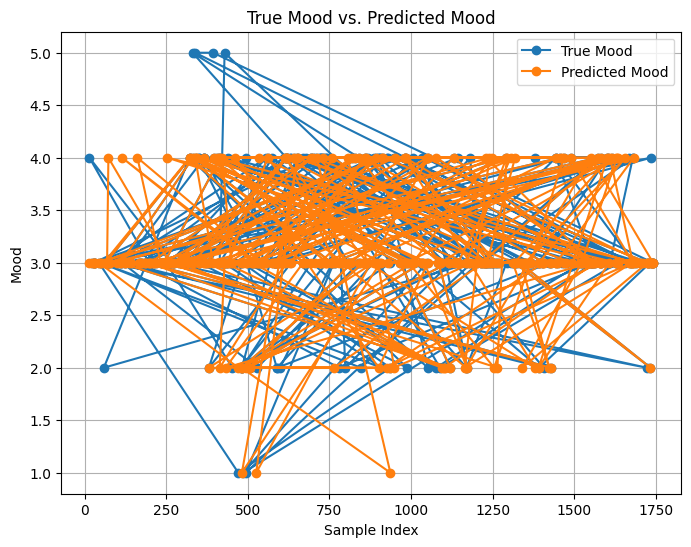

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness', 'readiness']
target = 'mood'

X = combined_wellness[features]
y = combined_wellness[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

feature_values = []
for feature in features:
    value = float(input(f"Enter the value for {feature}: "))
    feature_values.append(value)

input_data = pd.DataFrame([feature_values], columns=features)

predicted_mood = knn_classifier.predict(input_data)[0]

print("Predicted mood:", predicted_mood)

y_pred_test = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Test set accuracy:", accuracy)


plt.figure(figsize=(8, 6))
plt.plot(X_test.index, y_test, label='True Mood', marker='o')
plt.plot(X_test.index, y_pred_test, label='Predicted Mood', marker='o')
plt.xlabel('Sample Index')
plt.ylabel('Mood')
plt.title('True Mood vs. Predicted Mood')
plt.legend()
plt.grid(True)
plt.show()


y = sleep duration

Enter the value for sleep_quality: 4
Enter the value for stress: 4
Enter the value for soreness: 4
Enter the value for readiness: 4
Enter the value for mood: 4
Predicted sleep duration: 9.666666666666666
Predicted accuracy: 0.16958026049679975


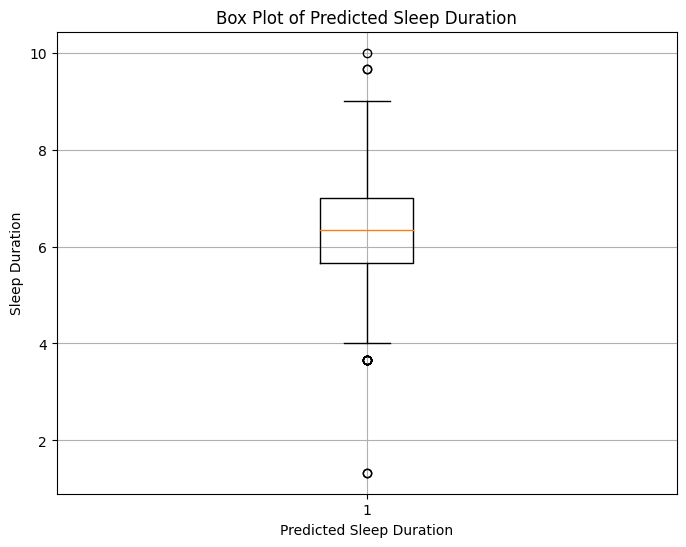

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import numpy as np

features = ['sleep_quality', 'stress', 'soreness', 'readiness', 'mood']
target = 'sleep_duration_h'


X = combined_wellness[features]
y = combined_wellness[target]

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X, y)

feature_values = []
for feature in features:
    value = float(input(f"Enter the value for {feature}: "))
    feature_values.append(value)

input_data = pd.DataFrame([feature_values], columns=features)

predicted_sleep_duration = knn_regressor.predict(input_data)[0]

print("Predicted sleep duration:", predicted_sleep_duration)


y_pred = knn_regressor.predict(X)
accuracy = r2_score(y, y_pred)
print("Predicted accuracy:", accuracy)


plt.figure(figsize=(8, 6))
plt.boxplot(y_pred)
plt.xlabel('Predicted Sleep Duration')
plt.ylabel('Sleep Duration')
plt.title('Box Plot of Predicted Sleep Duration')
plt.grid(True)
plt.show()


Enter the value for sleep_quality: 4
Enter the value for stress: 3
Enter the value for soreness: 4
Enter the value for readiness: 2
Enter the value for mood: 3
Predicted sleep duration: 7.0
Predicted accuracy: 0.16958026049679975


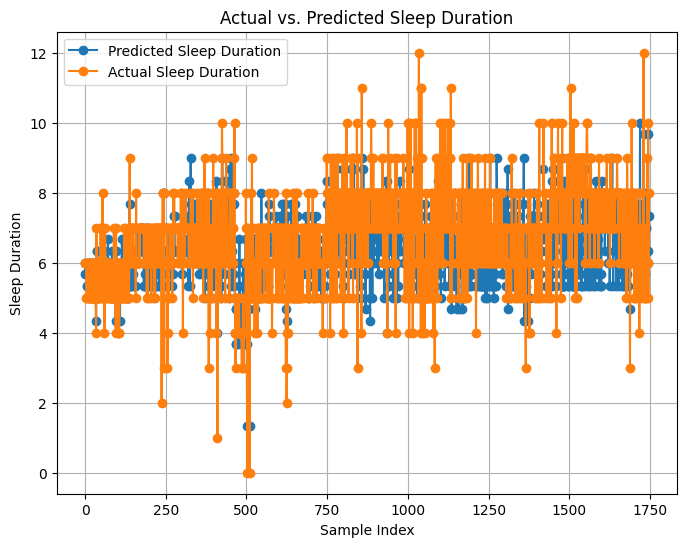

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

features = ['sleep_quality', 'stress', 'soreness', 'readiness', 'mood']
target = 'sleep_duration_h'

X = combined_wellness[features]
y = combined_wellness[target]

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X, y)

feature_values = []
for feature in features:
    value = float(input(f"Enter the value for {feature}: "))
    feature_values.append(value)

input_data = pd.DataFrame([feature_values], columns=features)

predicted_sleep_duration = knn_regressor.predict(input_data)[0]

print("Predicted sleep duration:", predicted_sleep_duration)

y_pred = knn_regressor.predict(X)
accuracy = r2_score(y, y_pred)
print("Predicted accuracy:", accuracy)

plt.figure(figsize=(8, 6))
plt.plot(y_pred, label='Predicted Sleep Duration', marker='o')
plt.plot(y, label='Actual Sleep Duration', marker='o')
plt.xlabel('Sample Index')
plt.ylabel('Sleep Duration')
plt.title('Actual vs. Predicted Sleep Duration')
plt.legend()
plt.grid(True)
plt.show()


x=mood

In [152]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

features = ['mood']
targets = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness']

X = combined_wellness[features]
y = combined_wellness[targets]

knn_regressor = KNeighborsRegressor(n_neighbors=3)

knn_regressor.fit(X, y)

feature_value = float(input("Enter the value for mood: "))

input_data = pd.DataFrame([[feature_value]], columns=features)

predicted_values = knn_regressor.predict(input_data)

predicted_sleep_duration = predicted_values[0][0]
predicted_sleep_quality = predicted_values[0][1]
predicted_stress = predicted_values[0][2]
predicted_soreness = predicted_values[0][3]

print("Predicted sleep duration:", predicted_sleep_duration)
print("Predicted sleep quality:", predicted_sleep_quality)
print("Predicted stress:", predicted_stress)
print("Predicted soreness:", predicted_soreness)


Enter the value for mood: 4
Predicted sleep duration: 6.666666666666667
Predicted sleep quality: 3.6666666666666665
Predicted stress: 3.3333333333333335
Predicted soreness: 2.6666666666666665


Enter the value for mood: 4
Predicted sleep duration: 6.666666666666667
Predicted sleep quality: 3.6666666666666665
Predicted stress: 3.3333333333333335
Predicted soreness: 2.6666666666666665


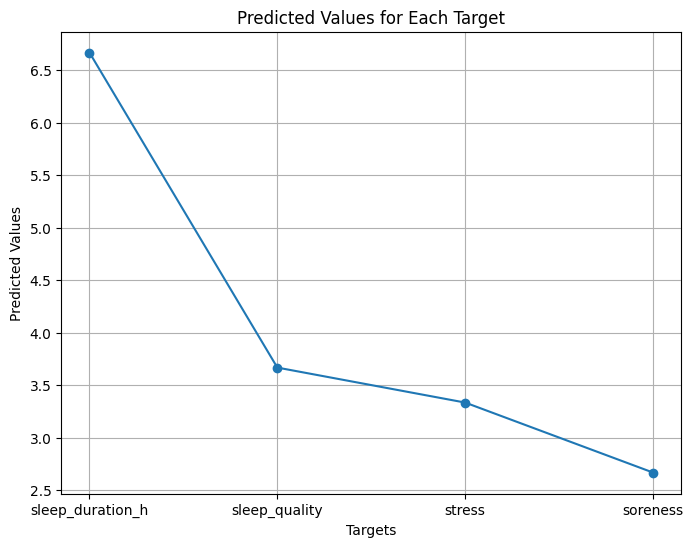

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

features = ['mood']
targets = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness']

X = combined_wellness[features]
y = combined_wellness[targets]

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X, y)

feature_value = float(input("Enter the value for mood: "))

input_data = pd.DataFrame([[feature_value]], columns=features)

predicted_values = knn_regressor.predict(input_data)

predicted_sleep_duration = predicted_values[0][0]
predicted_sleep_quality = predicted_values[0][1]
predicted_stress = predicted_values[0][2]
predicted_soreness = predicted_values[0][3]

print("Predicted sleep duration:", predicted_sleep_duration)
print("Predicted sleep quality:", predicted_sleep_quality)
print("Predicted stress:", predicted_stress)
print("Predicted soreness:", predicted_soreness)

plt.figure(figsize=(8, 6))
plt.plot(targets, predicted_values[0], marker='o')
plt.xlabel('Targets')
plt.ylabel('Predicted Values')
plt.title('Predicted Values for Each Target')
plt.grid(True)
plt.show()


x=stress - kneighbour

In [153]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

features = ['stress']
targets = ['sleep_duration_h', 'sleep_quality', 'mood', 'soreness']

X = combined_wellness[features]
y = combined_wellness[targets]

knn_regressor = KNeighborsRegressor(n_neighbors=3)

knn_regressor.fit(X, y)

feature_value = float(input("Enter the value for stress: "))

input_data = pd.DataFrame([[feature_value]], columns=features)

predicted_values = knn_regressor.predict(input_data)



predicted_sleep_duration = predicted_values[0][0]
predicted_sleep_quality = predicted_values[0][1]
predicted_stress = predicted_values[0][2]
predicted_soreness = predicted_values[0][3]



print("Predicted sleep duration:", predicted_sleep_duration)
print("Predicted sleep quality:", predicted_sleep_quality)
print("Predicted stress:", predicted_stress)
print("Predicted soreness:", predicted_soreness)

Enter the value for stress: 3
Predicted sleep duration: 6.0
Predicted sleep quality: 3.0
Predicted stress: 3.0
Predicted soreness: 2.3333333333333335


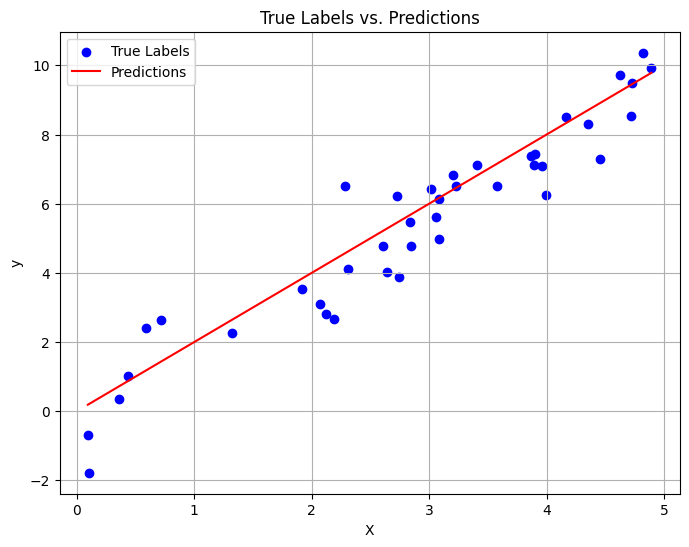

In [154]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X_test = np.sort(5 * np.random.rand(40, 1), axis=0)
y_test = 2 * X_test + np.random.randn(40, 1)

y_pred = 2 * X_test

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='True Labels')
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('True Labels vs. Predictions')
plt.legend()
plt.grid(True)
plt.show()


In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

X = combined_wellness['readiness']
y = combined_wellness[['sleep_duration_h', 'sleep_quality', 'stress', 'soreness', 'mood']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_scaled, y_train)

feature_value = float(input("Enter the value for readiness: "))
input_data = pd.DataFrame([[feature_value]], columns=['readiness'])
input_data_scaled = scaler.transform(input_data)

predicted_values = knn_regressor.predict(input_data_scaled)

accuracy = knn_regressor.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

predicted_sleep_duration = predicted_values[0][0]
predicted_sleep_quality = predicted_values[0][1]
predicted_stress = predicted_values[0][2]
predicted_soreness = predicted_values[0][3]
predicted_mood = predicted_values[0][4]

print("Predicted sleep duration:", predicted_sleep_duration)
print("Predicted sleep quality:", predicted_sleep_quality)
print("Predicted stress:", predicted_stress)
print("Predicted soreness:", predicted_soreness)
print("Predicted mood:", predicted_mood)


Enter the value for readiness: 3
Accuracy: -0.12106693573014118
Predicted sleep duration: 7.333333333333333
Predicted sleep quality: 3.0
Predicted stress: 3.3333333333333335
Predicted soreness: 3.3333333333333335
Predicted mood: 3.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


x=readiness

In [156]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

X = combined_wellness['readiness']
y = combined_wellness[['sleep_duration_h', 'sleep_quality', 'stress', 'soreness', 'mood']]

knn_regressor = KNeighborsRegressor(n_neighbors=3)

knn_regressor.fit(X.values.reshape(-1, 1), y)

feature_value = float(input("Enter the value for readiness: "))

input_data = pd.DataFrame([[feature_value]], columns=['readiness'])

predicted_values = knn_regressor.predict(input_data)
accuracy = nn_regressor.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

predicted_sleep_duration = predicted_values[0][0]
predicted_sleep_quality = predicted_values[0][1]
predicted_stress = predicted_values[0][2]
predicted_soreness = predicted_values[0][3]
predicted_mood = predicted_values[0][4]

print("Predicted sleep duration:", predicted_sleep_duration)
print("Predicted sleep quality:", predicted_sleep_quality)
print("Predicted stress:", predicted_stress)
print("Predicted soreness:", predicted_soreness)
print("Predicted mood:", predicted_mood)


Enter the value for readiness: 4
Accuracy: 0.0706738140189656
Predicted sleep duration: 5.666666666666667
Predicted sleep quality: 2.6666666666666665
Predicted stress: 3.0
Predicted soreness: 3.0
Predicted mood: 3.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


multiple y in kNN for readiness

Enter the value for readiness: 4
Accuracy: 0.0706738140189656
Predicted sleep duration: 6.763176395776066
Predicted sleep quality: 2.991648301847312
Predicted stress: 2.9345287368117
Predicted soreness: 2.765279992282658
Predicted mood: 3.237995010997639


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


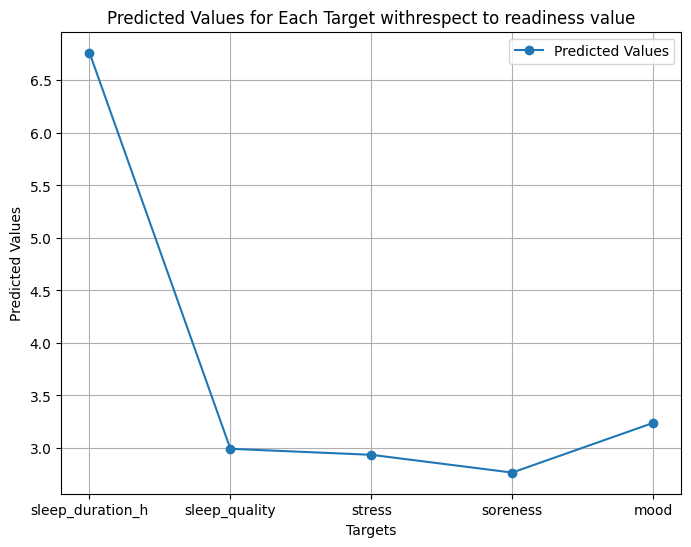

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

features = ['readiness']
targets = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness', 'mood']

X = combined_wellness[features]
y = combined_wellness[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)

nn_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
nn_regressor.fit(X_train_scaled, y_train)

feature_value = float(input("Enter the value for readiness: "))
input_data = np.array([[feature_value]])
input_data_scaled = scaler.transform(input_data)
predicted_values = nn_regressor.predict(input_data_scaled)

predicted_sleep_duration = predicted_values[0][0]
predicted_sleep_quality = predicted_values[0][1]
predicted_stress = predicted_values[0][2]
predicted_soreness = predicted_values[0][3]
predicted_mood = predicted_values[0][4]

accuracy = nn_regressor.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

print("Predicted sleep duration:", predicted_sleep_duration)
print("Predicted sleep quality:", predicted_sleep_quality)
print("Predicted stress:", predicted_stress)
print("Predicted soreness:", predicted_soreness)
print("Predicted mood:", predicted_mood)


plt.figure(figsize=(8, 6))
plt.plot(targets, predicted_values[0], label='Predicted Values', marker='o')
plt.xlabel('Targets')
plt.ylabel('Predicted Values')
plt.title('Predicted Values for Each Target withrespect to readiness value')
plt.legend()
plt.grid(True)
plt.show()


multiple y prediction using neural network

In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

features = ['readiness']
targets = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness', 'mood']


X = combined_wellness[features]
y = combined_wellness[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)



nn_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

nn_regressor.fit(X_train_scaled, y_train)


feature_value = float(input("Enter the value for readiness: "))
input_data = np.array([[feature_value]])
input_data_scaled = scaler.transform(input_data)
predicted_values = nn_regressor.predict(input_data_scaled)


predicted_sleep_duration = predicted_values[0][0]
predicted_sleep_quality = predicted_values[0][1]
predicted_stress = predicted_values[0][2]
predicted_soreness = predicted_values[0][3]
predicted_mood = predicted_values[0][4]

accuracy = nn_regressor.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

print("Predicted sleep duration:", predicted_sleep_duration)
print("Predicted sleep quality:", predicted_sleep_quality)
print("Predicted stress:", predicted_stress)
print("Predicted soreness:", predicted_soreness)
print("Predicted mood:", predicted_mood)


Enter the value for readiness: 4
Accuracy: 0.0706738140189656
Predicted sleep duration: 6.763176395776066
Predicted sleep quality: 2.991648301847312
Predicted stress: 2.9345287368117
Predicted soreness: 2.765279992282658
Predicted mood: 3.237995010997639


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

features = ['readiness']
targets = ['sleep_duration_h', 'sleep_quality', 'stress', 'soreness', 'mood']

X = combined_wellness[features]
y = combined_wellness[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'hidden_layer_sizes': [(100,), (100, 100), (50, 50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 500, 1000]
}


mlp_regressor = MLPRegressor(random_state=42)

grid_search = GridSearchCV(mlp_regressor, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


mlp_regressor_best = MLPRegressor(random_state=42, **best_params)
mlp_regressor_best.fit(X_train_scaled, y_train)

feature_value = float(input("Enter the value for readiness: "))
input_data = np.array([[feature_value]])
input_data_scaled = scaler.transform(input_data)
predicted_values = mlp_regressor_best.predict(input_data_scaled)

predicted_sleep_duration = predicted_values[0][0]
predicted_sleep_quality = predicted_values[0][1]
predicted_stress = predicted_values[0][2]
predicted_soreness = predicted_values[0][3]
predicted_mood = predicted_values[0][4]

accuracy = mlp_regressor_best.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

print("Predicted sleep duration:", predicted_sleep_duration)
print("Predicted sleep quality:", predicted_sleep_quality)
print("Predicted stress:", predicted_stress)
print("Predicted soreness:", predicted_soreness)
print("Predicted mood:", predicted_mood)


Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'max_iter': 200}
Enter the value for readiness: 4
Accuracy: 0.06905128104370892
Predicted sleep duration: 6.723809052874392
Predicted sleep quality: 2.9703580873885778
Predicted stress: 2.929168791928384
Predicted soreness: 2.761742502912101
Predicted mood: 3.206080585949909


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


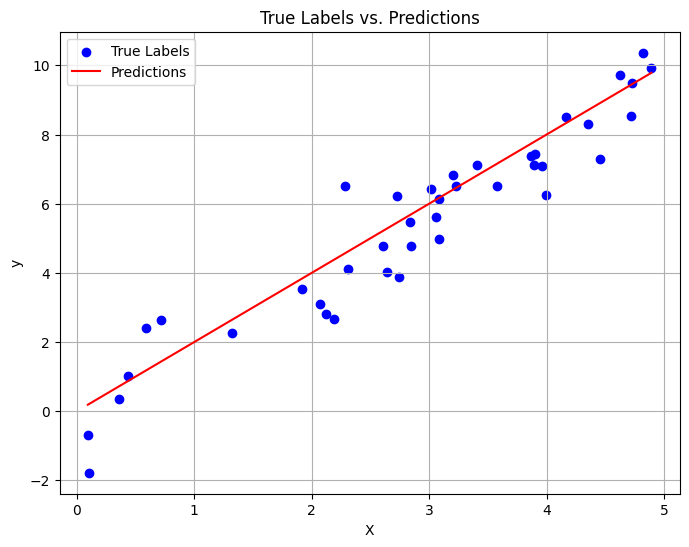

In [159]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X_test = np.sort(5 * np.random.rand(40, 1), axis=0)
y_test = 2 * X_test + np.random.randn(40, 1)

y_pred = 2 * X_test

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='True Labels')
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('True Labels vs. Predictions')
plt.legend()
plt.grid(True)
plt.show()
